In [1]:
import csv
import collections
redis_key = []
timestamp = []
feature = []
redis_time = []
position = collections.defaultdict()
with open('9690644918.csv','r') as f:
    reader = csv.reader((line.replace('\0','') for line in f), delimiter = ",")
    index = -1
    for row in reader:
        if index == -1:
            index += 1
            continue
        redis_key.append(row[2])
        timestamp.append(row[3])
        feature.append(row[4:])
        redis_time.append(row[2].split('_')[2])
        if row[4] != '':
            position[row[2].split('_')[2]] = index
        index += 1

In [2]:
position

defaultdict(None,
            {'27607297': 6,
             '27607313': 8,
             '27607304': 10,
             '27607270': 30,
             '27607295': 36,
             '27607284': 39,
             '27607275': 49,
             '27607312': 58,
             '27607267': 64,
             '27607290': 66,
             '27607262': 79,
             '27607298': 90,
             '27607302': 104,
             '27607263': 106,
             '27607286': 110,
             '27607261': 114,
             '27607288': 123,
             '27607303': 129,
             '27607289': 138,
             '27607294': 139,
             '27607283': 143,
             '27607307': 145,
             '27607318': 151,
             '27607311': 166,
             '27607266': 181,
             '27607271': 186,
             '27607314': 201,
             '27607293': 210,
             '27607299': 211,
             '27607310': 213,
             '27607279': 216,
             '27607301': 219,
             '27607309': 220,
      

In [3]:
sums_high = 0
for key in position:
    if feature[position[key]] and feature[position[key]][-1][18:] == 'true}"':
        sums_high += 1
print('该live id的检测片段个数为{}'.format(len(position)))
print('该live id的含有高光的片段个数为{}'.format(sums_high))
print('高光片段占比为{}'.format(sums_high / len(position)))

该live id的检测片段个数为201
该live id的含有高光的片段个数为95
高光片段占比为0.472636815920398


In [4]:
keys = sorted(position)
have_high = []
y = [0] * len(position)
i = 0
for key in keys:
    if feature[position[key]] and feature[position[key]][-1][18:] == 'true}"':
        y[i] = 2
        have_high.append(key)
    if feature[position[key]] and feature[position[key]][-1][18:] == 'false}"':
        y[i] = 1
    i += 1

In [5]:
import numpy as np
x = [int(redis_time[position[i]]) for i in keys]
from datetime import datetime
x = [datetime.fromtimestamp(int(i)*60) for i in x]

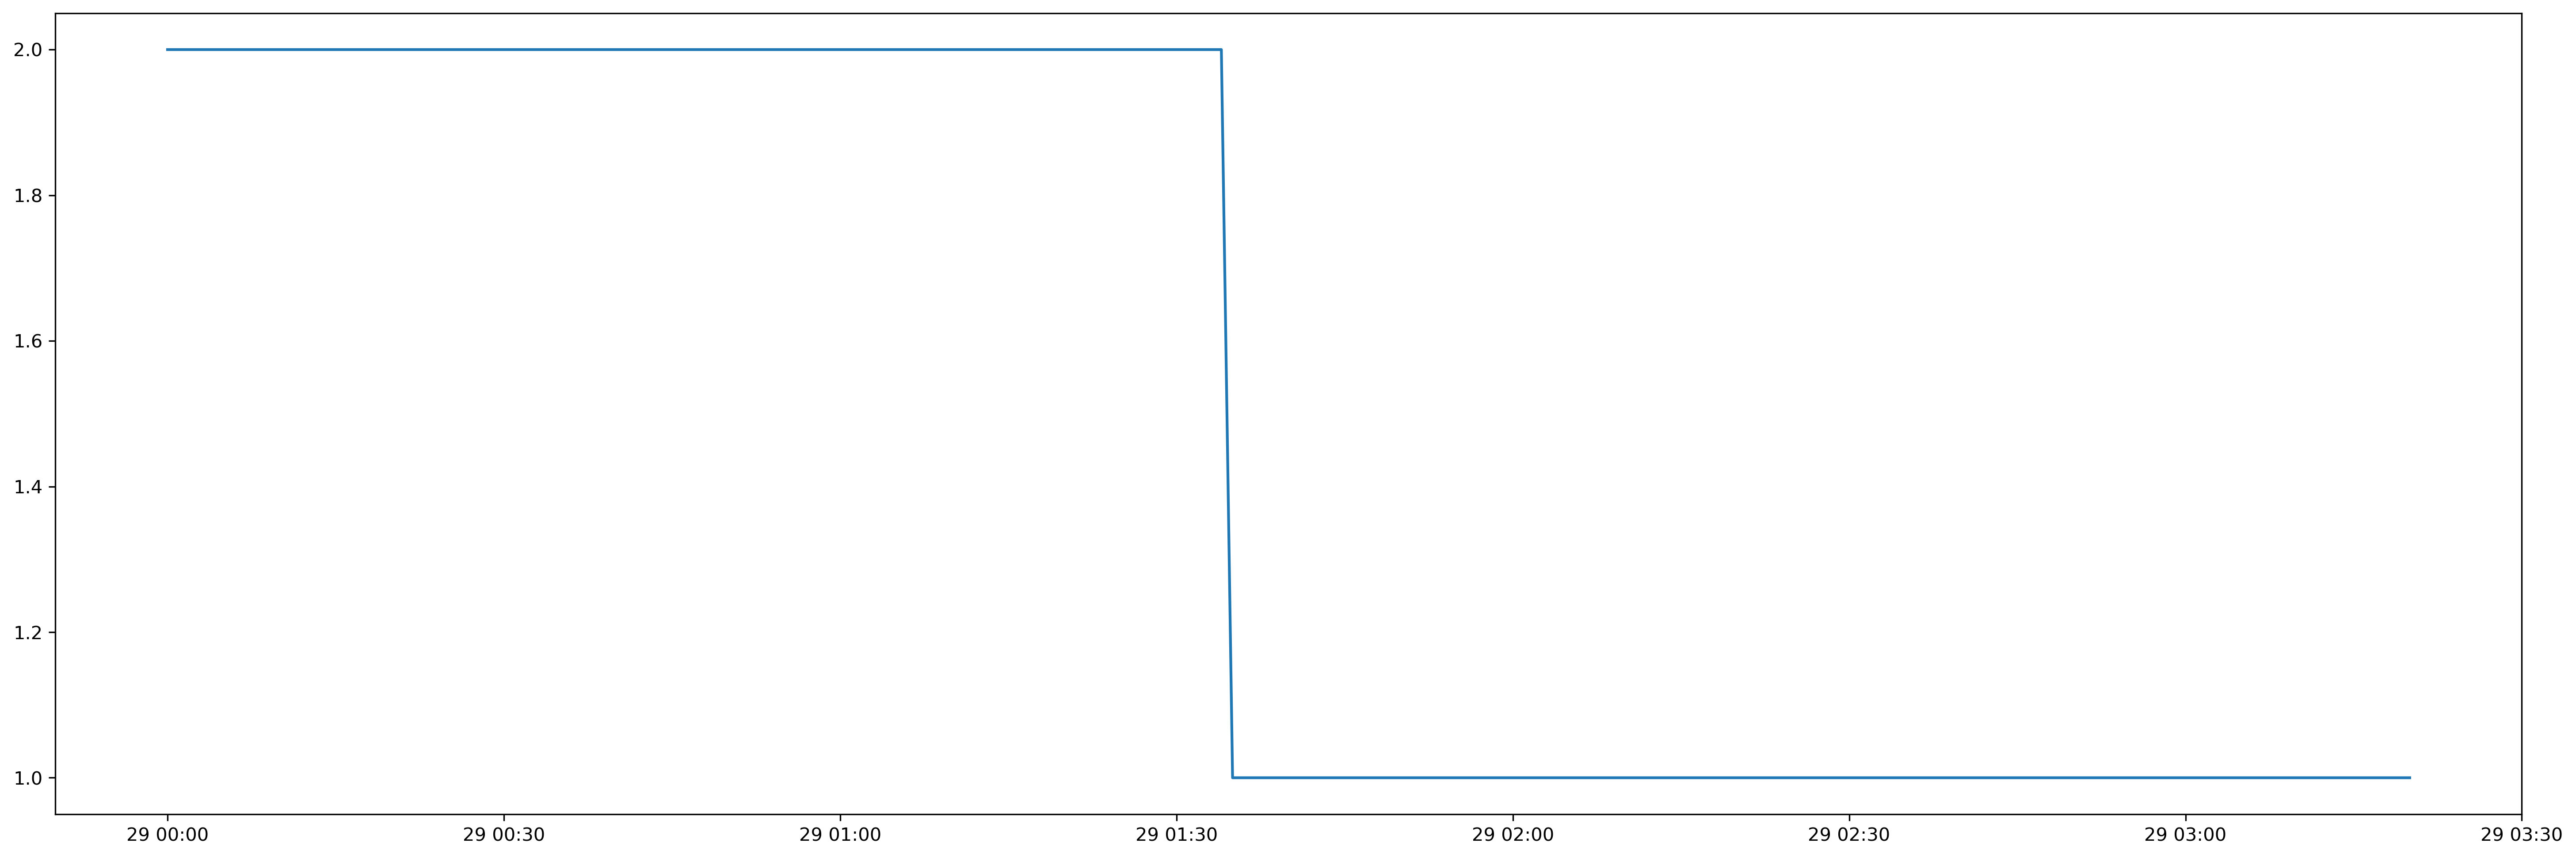

In [6]:
import matplotlib.pyplot as plt
plt.figure(dpi=300,figsize=(24,8))
plt.plot(x,y)
plt.show()

In [7]:
def gettimes(times):
    ans = []
    index = 0
    while index < len(times):
        if index + 1 == len(times):
            ans.append(str(times[index]))
            break
        else:
            bench = times[index]+10
            for i in range(index+1,len(times)):
                if times[i] > bench:
                    break
            ans.append(str(times[index]))
            index = i
    return ans

In [8]:
times = [int(x) for x in have_high]
highlight = gettimes(times)

In [10]:
highlight

['27607200',
 '27607211',
 '27607222',
 '27607233',
 '27607244',
 '27607255',
 '27607266',
 '27607277',
 '27607288',
 '27607294']

In [9]:
from datetime import datetime
for i in range(len(highlight)):
    time = int(highlight[i])*60
    print(time)
    t = datetime.fromtimestamp(time)
    print('高光开始时间为 {}'.format(t))

1656432000
高光开始时间为 2022-06-29 00:00:00
1656432660
高光开始时间为 2022-06-29 00:11:00
1656433320
高光开始时间为 2022-06-29 00:22:00
1656433980
高光开始时间为 2022-06-29 00:33:00
1656434640
高光开始时间为 2022-06-29 00:44:00
1656435300
高光开始时间为 2022-06-29 00:55:00
1656435960
高光开始时间为 2022-06-29 01:06:00
1656436620
高光开始时间为 2022-06-29 01:17:00
1656437280
高光开始时间为 2022-06-29 01:28:00
1656437640
高光开始时间为 2022-06-29 01:34:00


In [9]:
import time
a = "2021-10-1 22:50:00"
timearray = time.strptime(a,"%Y-%m-%d %H:%M:%S")
timeStamp = int(time.mktime(timearray))